In [1]:
# Load the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the the benin dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

Understanding the Dataset

In [3]:
# Check the shape of the dataset
df.shape

(525600, 19)

In [4]:
# Print all the columns of the dataset
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [5]:
# Summary statistics for each column in the dataset
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [6]:
# Check for null values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# Check for duplicate entries
df.duplicated().sum()

0

Data Preprocessing

In [8]:
# Remove the Comments column as it is an empty column
df = df.drop(columns=['Comments'])

In [9]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [10]:
df['Timestamp']

0        2021-10-30 00:01:00
1        2021-10-30 00:02:00
2        2021-10-30 00:03:00
3        2021-10-30 00:04:00
4        2021-10-30 00:05:00
                 ...        
525595   2022-10-29 23:56:00
525596   2022-10-29 23:57:00
525597   2022-10-29 23:58:00
525598   2022-10-29 23:59:00
525599   2022-10-30 00:00:00
Name: Timestamp, Length: 525600, dtype: datetime64[ns]

In [11]:
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
5,2021-10-30 00:06:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.7
6,2021-10-30 00:07:00,-0.7,0.0,-0.8,0.0,0.0,22.0,99.4,0.1,0.7,0.2,240.4,0.0,1002,0,0.0,22.3,22.7
7,2021-10-30 00:08:00,-0.7,0.0,-0.8,0.0,0.0,22.0,99.5,0.2,0.7,0.4,233.5,1.6,1002,0,0.0,22.4,22.7
8,2021-10-30 00:09:00,-0.7,-0.1,-0.8,0.0,0.0,22.0,99.5,0.7,1.1,0.5,232.0,0.3,1002,0,0.0,22.4,22.7
9,2021-10-30 00:10:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.6,1.1,0.5,232.5,0.3,1002,0,0.0,22.4,22.7


In [12]:
# Check for negative values in GHI, DNI, DHI
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]

In [13]:
# Count the negative values in each column
negative_counts = negative_values[['GHI', 'DNI', 'DHI']].apply(lambda x: (x < 0).sum())

In [14]:
negative_counts

GHI    261135
DNI    266352
DHI    263128
dtype: int64

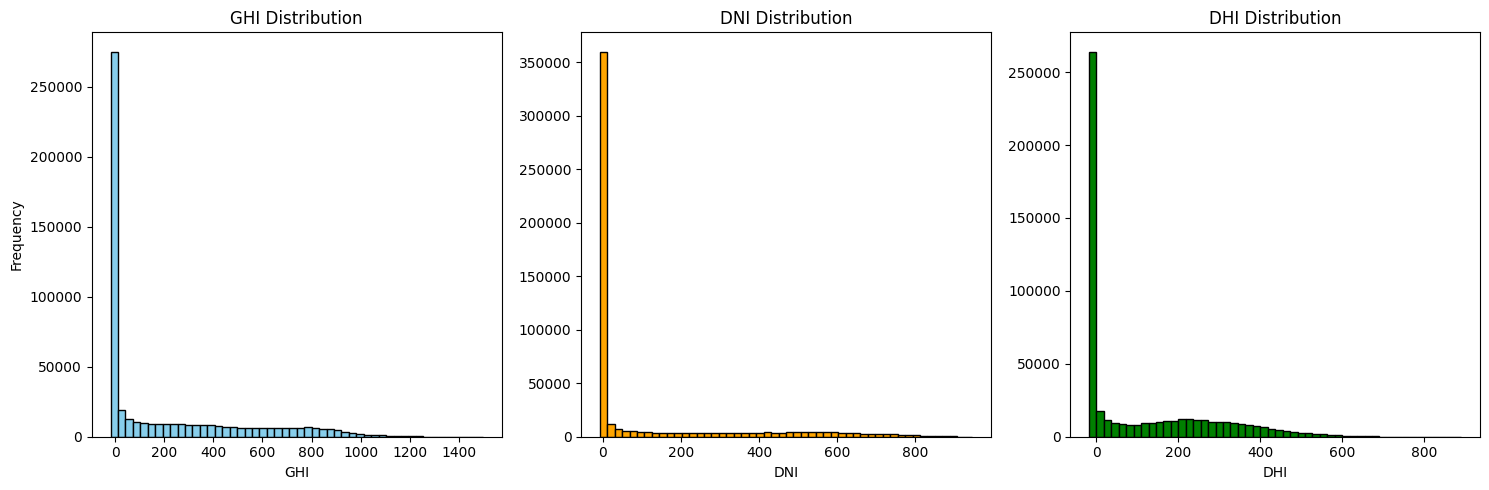

In [15]:
# Plot the distribution of GHI, DNI, DHI to inspect the data
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['DNI'], bins=50, color='orange', edgecolor='black')
plt.title('DNI Distribution')
plt.xlabel('DNI')

plt.subplot(1, 3, 3)
plt.hist(df['DHI'], bins=50, color='green', edgecolor='black')
plt.title('DHI Distribution')
plt.xlabel('DHI')

plt.tight_layout()
plt.show()


In [16]:
# Inspect the times when negative values occur
negative_times = negative_values['Timestamp']
negative_counts, negative_times.head()

(GHI    261135
 DNI    266352
 DHI    263128
 dtype: int64,
 0   2021-10-30 00:01:00
 1   2021-10-30 00:02:00
 2   2021-10-30 00:03:00
 3   2021-10-30 00:04:00
 4   2021-10-30 00:05:00
 Name: Timestamp, dtype: datetime64[ns])

In [17]:
# Calculate the median of positive values only
ghi_median_pos = df.loc[df['GHI'] >= 0, 'GHI'].median()
dni_median_pos = df.loc[df['DNI'] >= 0, 'DNI'].median()
dhi_median_pos = df.loc[df['DHI'] >= 0, 'DHI'].median()


In [84]:
# Output the positive medians for verification
print(f"GHI Median: {ghi_median_pos}, DNI Median: {dni_median_pos}, DHI Median: {dhi_median_pos}")

GHI Median: 474.2, DNI Median: 345.7, DHI Median: 213.4


In [19]:
# Replace negative values with the median of the respective column
df['GHI'] = df['GHI'].apply(lambda x: ghi_median_pos if x < 0 else x)
df['DNI'] = df['DNI'].apply(lambda x: dni_median_pos if x < 0 else x)
df['DHI'] = df['DHI'].apply(lambda x: dhi_median_pos if x < 0 else x)

In [87]:

# Optional: Print to confirm changes
print(df[['GHI', 'DNI', 'DHI']].head())

     GHI    DNI    DHI
0  474.2  345.7  213.4
1  474.2  345.7  213.4
2  474.2  345.7  213.4
3  474.2  345.7  213.4
4  474.2  345.7  213.4


Explanatory Analysis

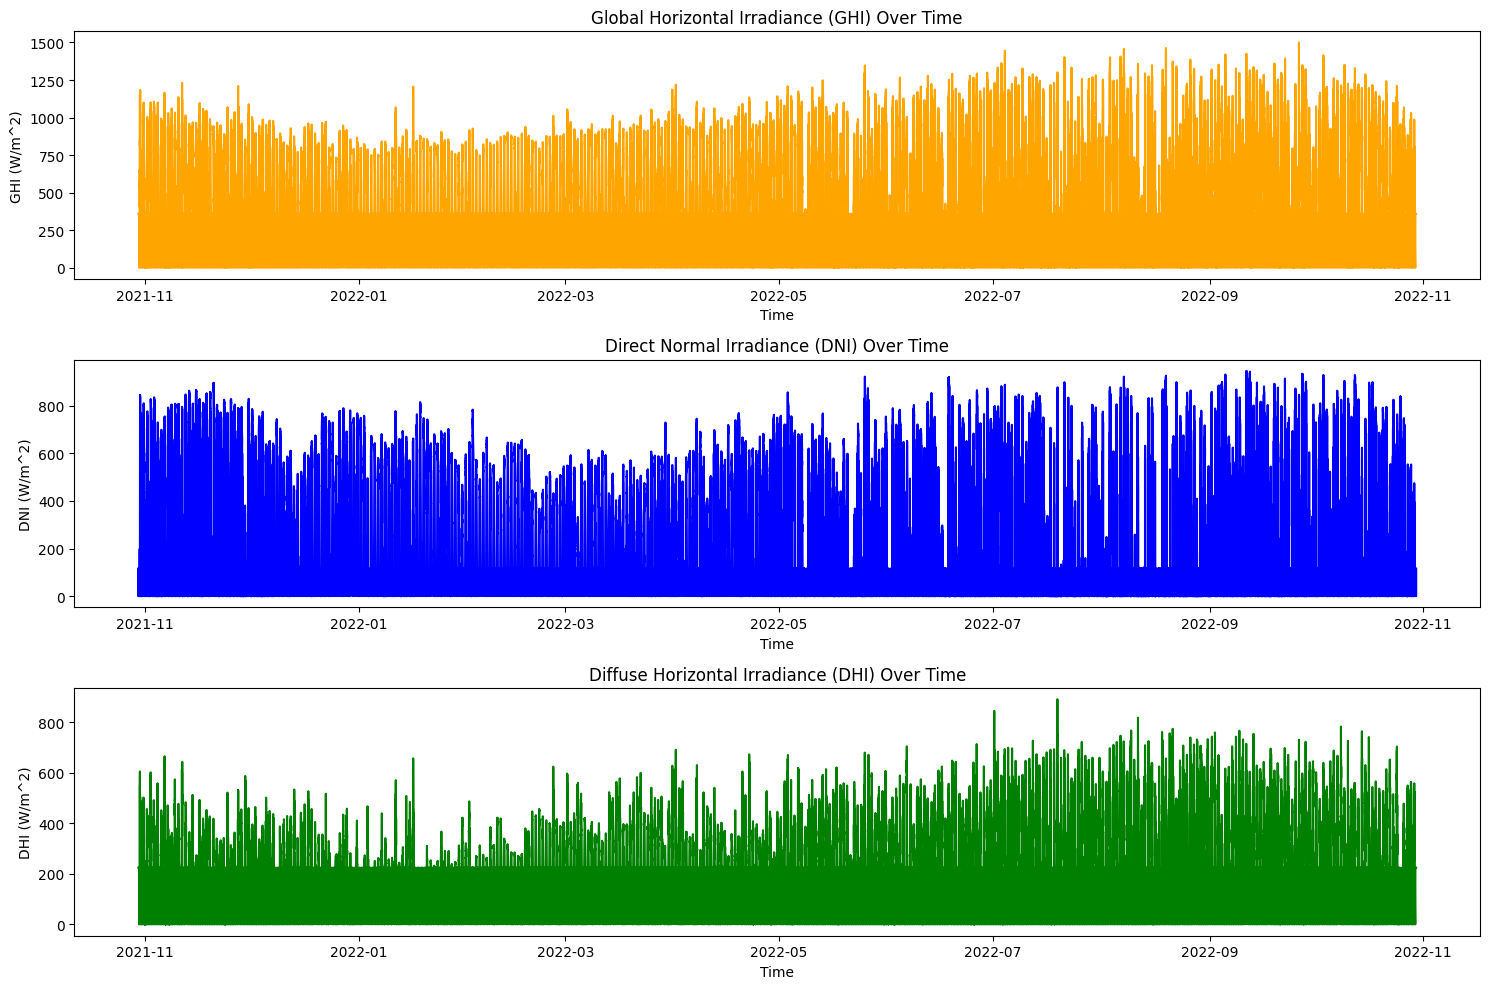

In [20]:
# Plotting GHI, DNI, and DHI over time
plt.figure(figsize=(15, 10))

# Plot Global Horizontal Irradiance (GHI)
plt.subplot(3, 1, 1)
plt.plot(df['Timestamp'], df['GHI'], color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Time')
plt.ylabel('GHI (W/m^2)')


# Plot Direct Normal Irradiance (DNI)
plt.subplot(3, 1, 2)
plt.plot(df['Timestamp'], df['DNI'], color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Time')
plt.ylabel('DNI (W/m^2)')


# Plot Diffuse Horizontal Irradiance (DHI)
plt.subplot(3, 1, 3)
plt.plot(df['Timestamp'], df['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Time')
plt.ylabel('DHI (W/m^2)')

plt.tight_layout()
plt.show()

Statistical Analysis

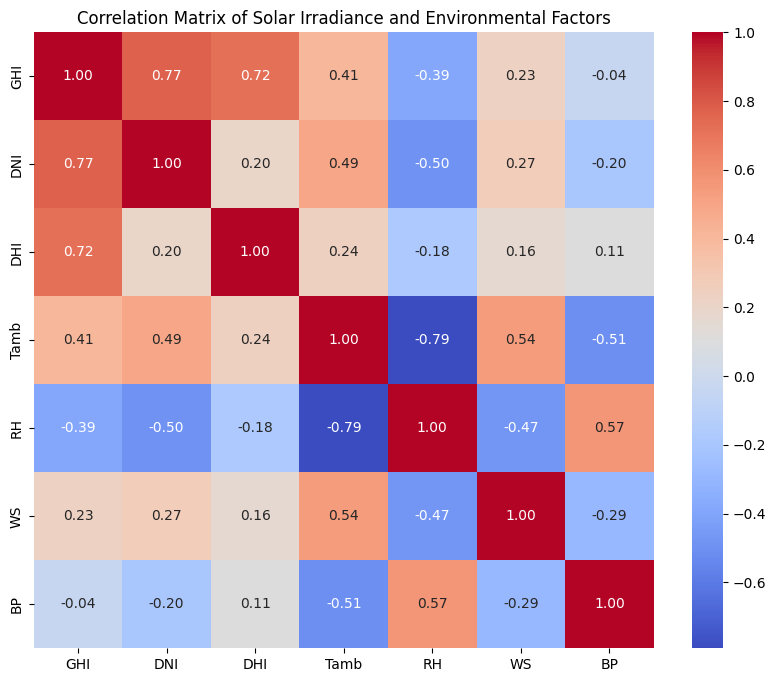

In [21]:
# Correlation analysis between GHI, DNI, DHI, and other environmental factors
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Solar Irradiance and Environmental Factors')
plt.show()

In [22]:
# Calculate monthly averages to analyze seasonal trends
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].mean()

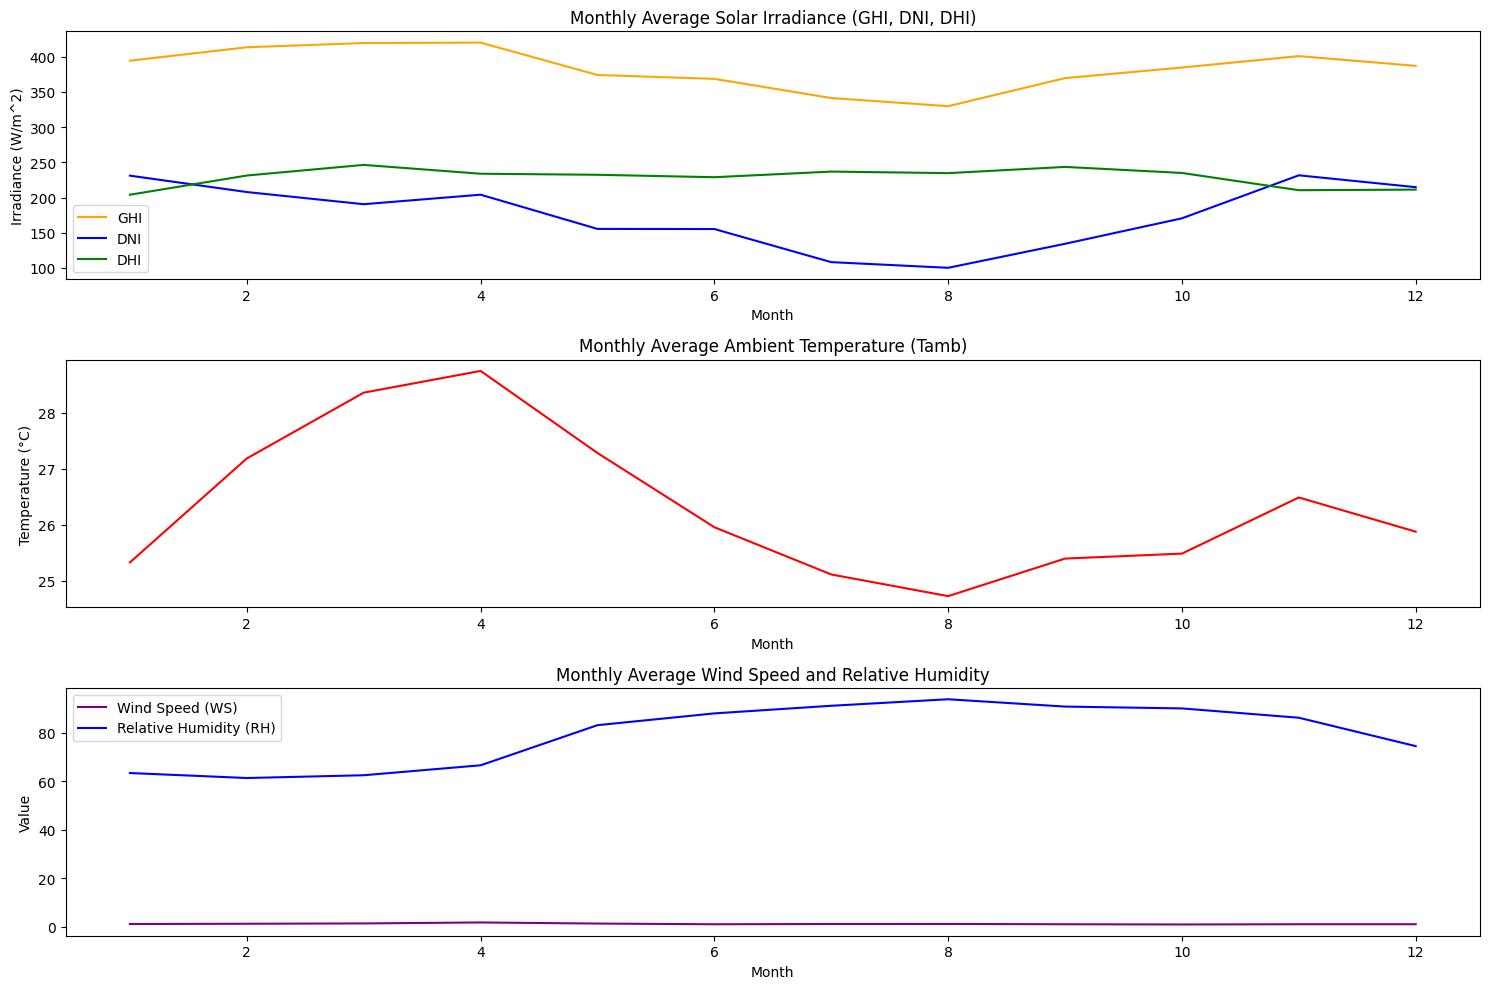

In [23]:
# Plotting seasonal trends
plt.figure(figsize=(15, 10))

# GHI, DNI, DHI monthly trends
plt.subplot(3, 1, 1)
plt.plot(monthly_avg.index, monthly_avg['GHI'], label='GHI', color='orange')
plt.plot(monthly_avg.index, monthly_avg['DNI'], label='DNI', color='blue')
plt.plot(monthly_avg.index, monthly_avg['DHI'], label='DHI', color='green')
plt.title('Monthly Average Solar Irradiance (GHI, DNI, DHI)')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()

# Temperature (Tamb) monthly trend
plt.subplot(3, 1, 2)
plt.plot(monthly_avg.index, monthly_avg['Tamb'], color='red')
plt.title('Monthly Average Ambient Temperature (Tamb)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Wind Speed (WS) and Humidity (RH) monthly trends
plt.subplot(3, 1, 3)
plt.plot(monthly_avg.index, monthly_avg['WS'], label='Wind Speed (WS)', color='purple')
plt.plot(monthly_avg.index, monthly_avg['RH'], label='Relative Humidity (RH)', color='blue')
plt.title('Monthly Average Wind Speed and Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# Summary statistics for key environmental factors
summary_stats = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].describe()
summary_stats

,GHI,DNI,DHI,Tamb,RH,WS,BP
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,383.017951,174.952927,228.914088,26.319394,79.448857,1.146113,999.876469
std,217.653053,193.599354,105.439689,4.398605,20.520775,1.239248,2.104419
min,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,993.000000
25%,356.700000,115.300000,225.000000,23.100000,68.700000,0.000000,999.000000
50%,359.500000,115.300000,225.000000,25.300000,85.400000,0.800000,1000.000000
75%,362.400000,115.300000,225.000000,29.400000,96.700000,2.000000,1001.000000
max,1499.000000,946.000000,892.000000,39.900000,100.000000,19.200000,1006.000000
